#  Import a species with complex genome (chromosome and plasmids) and make some operations

Please use the next cell to adjust the two following variables according to your installation: 
- path to GRATIOSA package
- path to database

In [5]:
import sys
## PATH TO PACKAGE:
## ----------------
## IF ALREADY IN YOUR PYTHON PATH (e.g. installation through Pip): nothing to do
## IF NOT IN YOUR PYTHON PATH (e.g. download from GitHub): 
## uncomment and adjust the following relevant line to the location of the GRATIOSA directory
## - For Linux/MacOS:             typical style ;-)
#sys.path.append('/home/usr/Python_venv/lib/python3.8/site-packages/') 
sys.path.insert(0,"/home/s/Downloads/GRATIOSA-master/")
#sys.path.append("/home/s/Downloads/GRATIOSA-master/")
## (- For Windows:                  typical style ;-)
#sys.path.append('C:\\Downloads\\GRATIOSA-master')


import os
## PATH TO DATABASE:
## -----------------
## FOR REGULAR USE OF THE PACKAGE:
#  Please set your system environment variable \$GRATIOSA_DB_PATH in order to have 
#  \$GRATIOSA_DB_PATH + data/organisms (e.g. export GRATIOSA_DB_PATH=/home/usr/documents/GRATIOSA/).
## FOR THIS TUTORIAL ONLY:
#  you can skip the system environment variable and just use the following line
#  We assume that the "data" directory containing the database is in the parent directory (otherwise adjust line)
os.environ["GRATIOSA_DB_PATH"]=os.getcwd()+"/../"
print("Using the database stored in: %s. Please check that this is correct."%(os.environ["GRATIOSA_DB_PATH"]))

Using the database stored in: /home/s/GRATIOSA/tutorials/../. Please check that this is correct.


In [6]:
# Loading the modules for data loading
from GRATIOSA import Genome, HiC, Transcriptome, GO

# Loading the statistical analysis and graphic modules
from GRATIOSA import stat_analysis, plot_stat_analysis
import numpy as np

## 1 - Creating a new dataset for Sinorhizobium ("sino") and import data files

### Automatic creation of the database: only for Unix/Linux systems

In [7]:
# We STRONGLY recommend installing the command-line tools from NCBI beforehand: https://www.ncbi.nlm.nih.gov/datasets/docs/v2/download-and-install/
# An alternate method (Linux only) downloads a large file manually from NCBI, which may take a LONG time depending on the internet connection. 
g = Genome.Genome("sino") 
g.create_database(NCBI_accession="GCA_000006965.1")

Created directory sino with standard file hierarchy
The attempt to fetch the annotation using the NCBI command-line tool failed. Trying to directly download from NCBI.
It may take a while, the complete file is ~600 Mb to download
Check the large temporary file at location /home/s/GRATIOSA/tutorials/assembly_summary.txt
Genome GCA_000006965.1 not found in the NCBI file (or no file)
Impossible to download annotation from NCBI, sorry.


grep: /home/s/GRATIOSA/tutorials/../data/assembly_summary_complete.txt: No such file or directory


### Manual creation of the database: for other systems. 

#### 1. Execute the following command to create the file directories

In [8]:
g = Genome.Genome("sino") 
g.create_database()

CAUTION: the directory/organism sino already exists
Please delete the directory from the GRATIOSA base directory if you wish to create this organism in the database


1

#### 2. Download the reference sequence () and annotation () and put them at the right locations (sino/ and sino/annotation/ respectively)

## 2. Loading the appropriate data files

#### The lines for automatic copying of data files below are written for Unix/Linux/MacOS systems. For Windows, it may lead to errors.  

In [4]:
g.load_seq()
g.load_annotation()

Detected a genome with 3 chromosomes
Chromosome/plasmid AL591688.1 of length 3654135
Chromosome/plasmid AE006469.1 of length 1354226
Chromosome/plasmid AL591985.1 of length 1683333
Sequence of organism sino loaded
Trying to load annotation from: /home/s/topo_data/data/sino/annotation/sequence.gff3
Annotation of sino loaded
Number of genes: 6527


In [8]:
# We import differential gene expression analysis data from Pini et al., Plos Gen, 2015: 10.1371/journal.pgen.1005232
# Transcriptome in the ctrA mutant compared to wild-type
# The Excel file was downloaded and converted to sino_2015_S3.csv (with tab delimited fields) 
# The user must move it to the fold_changes directory of the "sino" species and add relevant line(s) to fc.info file. 
# For simplicity, the following lines do that automatically
# First copy the file in the right directory
os.system("cp sino_2015_s3.csv %sdata/sino/fold_changes/"%os.environ["GRATIOSA_DB_PATH"])
# Then add a line to the info file. We select the expression after 2h of growth (columns 3 and 4)
os.system("cp fc.info %sdata/sino/fold_changes/"%os.environ["GRATIOSA_DB_PATH"])

0

In [9]:
# Same for expression
# First copy the file in the right directory
os.system("cp sino_2015_s3_levels.csv %sdata/sino/expression/"%os.environ["GRATIOSA_DB_PATH"])
# Then add a line to the info file. We select the expression after 2h of growth (columns 3 and 4)
os.system("cp expression.info %sdata/sino/expression/"%os.environ["GRATIOSA_DB_PATH"])

0

In [10]:
tr=Transcriptome.Transcriptome(g)
tr.load_expression()
tr.load_fc_pval()

Loading condition: Ctl
6080 expressions were successfully loaded
63 locus are not in annotation
6080 expressions were successfully loaded
63 locus are not in annotation
6080 expressions were successfully loaded
63 locus are not in annotation
6080 expressions were successfully loaded
63 locus are not in annotation
Loading condition: 2h
	62 locus are not in annotation
	62 locus are not in annotation
	62 locus are not in annotation
	62 locus are not in annotation


## 3 - Compare expression levels and fold-changes under crtA mutation between chromosomes

In [11]:
chromosomes_genes_vals={}
chromosomes_genes_fc={}
for i,chrom in enumerate(g.chromosome_name):
    chromosomes_genes_vals[chrom]=[g.genes[x].expression["Ctl"]-8 for x in g.genomes[i].genes.keys() if x in tr.genes_valid_fc["2h"]]    # we reduce the expression levels by an arbitrary constant to improve visualization
    chromosomes_genes_fc[chrom]=[g.genes[x].fc_pval["2h"][0] for x in g.genomes[i].genes.keys() if x in tr.genes_valid_fc["2h"]]

Results saved in /home/s/topo_data/resdir/student_test/student_test2024-06-11 14:53:12.648754


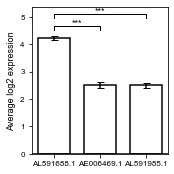

In [17]:
# Comopare the expression level between the three contigs (one chromosome and two large plasmids)
plot_stat_analysis.plot_student_test(chromosomes_genes_vals, ylabel="Average log2 expression", figsize=(2.5,2.5), output_file="Sino_chrom_expr")

Results saved in /home/s/topo_data/resdir/student_test/student_test2024-06-11 14:53:12.648754


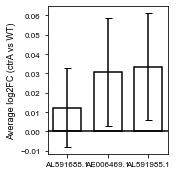

In [18]:
plot_stat_analysis.plot_student_test(chromosomes_genes_fc,ylabel="Average log2FC (ctrA vs WT)", figsize=(2.5,2.5), output_file="Sino_chrom_DE")

The genes located on the chromosome are significantly more expressed than those on the two large plasmids (by a factor of around 4). Those two are expressed similarly. 
The chromosome is less activated by the mutation than the plasmids, but it is not statistically significant. 

## 4 - Compare the expression level of genes in different orientations on the chromosome vs plasmids (one graph for each contig)

The analysis of gene orientation effects are not implemented for a multi-contig genome. However, it is very easy to work with each chromosome/plasmid successively, and analyze the orientation effects in each of them, as if they were single-chromosome genomes from different organisms. 

Operation load_neighbor_all completed for genome AL591688.1
Operation load_gene_orientation completed for genome AL591688.1
Results saved in /home/s/topo_data/resdir/student_test/student_test2024-06-11 14:53:12.648754


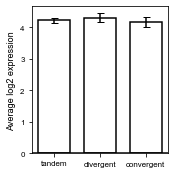

Operation load_neighbor_all completed for genome AE006469.1
Operation load_gene_orientation completed for genome AE006469.1
Results saved in /home/s/topo_data/resdir/student_test/student_test2024-06-11 14:53:12.648754


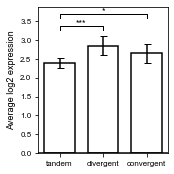

Operation load_neighbor_all completed for genome AL591985.1
Operation load_gene_orientation completed for genome AL591985.1
Results saved in /home/s/topo_data/resdir/student_test/student_test2024-06-11 14:53:12.648754


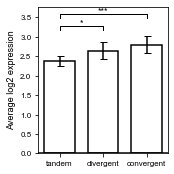

In [20]:
# Each contig (chromosome/plasmid) is associated to a separate genome object, 
# and we can work with each of them successively
for ge in g.genomes:
    # Load the orientation of genes within the considered contig
    ge.load_gene_orientation()
    ori={}
    for k in list(ge.orientation.keys())[:3]:
        ori[k]=[ge.genes[gene].expression["Ctl"]-8 for gene in ge.orientation[k] if gene in tr.genes_valid_fc["2h"]]
    plot_stat_analysis.plot_student_test(ori, ylabel="Average log2 expression", figsize=(2.5,2.5), output_file="Sino_ori_expr")

On the chromosome, the expression level is not significantly different depending on the orientation. However, it is on plasmids, with tandem genes being less expressed. Surprisingly, in one plasmid, convergent genes are more expressed, whereas on the other, it is divergent genes. 